# LDA
> "NLP"

- toc:true
- branch: master
- badges: true
- comments: true
- author: 이강철
- categories: [python]
- hide: false


# 1.  Abstract

토픽 모델링은 수집된 문서들을 비지도 방식으로 분류하는 방법이다.[1]

Latent Dirichlet Allocation (LDA)는 문서 집합들을 특정한 주제를 가지는 토픽들로 분류하기 위한 계층적 확률 모델로 다양한 분야에서 많이 사용되는 분야이다. 특히 컴퓨터 비전분야에서 두드러지는데 주석이나 라벨이 부착된 이미지를 분류를 하는 등 다양한 문제들을 처리하기 위해 사용된다.[2] 

LDA의 기본 가정은 여러 단어가 섞여 토픽을 이루고, 여러 토픽이 섞여 문서를 이룬다고 본다. 즉, 문서를  토픽들의 혼합체로 보는 것이다. 이는 각 문서의 내용(단어)이 서로 겹치게`overlap `해 둘 수 있다.[1]

## 1-1. 모든 문서는 토픽들의 혼합체이다.

각 문서에는 몇 가지 토픽에서 나온 단어가 특정 비율로 포함되어 있다고 생각한다. 예를 들어 2개의 토픽을 가지는 문서 집합이 있다고 하자

> example<br><br> 문서 1 : 토픽 A 90%, 토픽 B 10% $\to$ 토픽 A

> example<br><br> 문서 2 : 토픽 A 30%, 토픽 B 70% $\to$ 토픽 B

위 같은 경우 우리는 문서 1에서는 토픽 A가 90%를 차지하고 토픽 B가 10%를 차지하는 반면에, 문서 2에서는 토픽 A가 30%를 차지하고 토픽 B가 70%를 차지한다는 식으로 말할 수 있다.

## 1-2.  모든 토픽은 단어들의 혼합체이다.

예를 들어 `정치`와 `음식`이라는 두 가지 토픽이 존재한다고 하자.

정치 토픽에서 가장 흔히 사용되는 단어는 `대통령`, `TV`, `국회의원`과 같은 단어가 될 수 있지만 음식 토픽에서 가장 흔히 사용되는 용어는 `맛집`, `TV`, `불고기` 같은 단어가 될 수 있는 것이다. 만약 정치라는 토픽으로 분류된 아래와 같은 문서가 있다고 하자.

> example <br><br>국회위원 A씨가 `TV`에서 `맛집`으로 소문난 B라는 식당에 들려서 식사를 맛있게 했습니다. 또 ~~

위 같은 경우 해당 문서는 `정치`라는 토픽으로 분류가 되었지만 `음식`이라는 토픽에 포함된 단어들도 포함하고 있다. 이는 앞서 말한 `overlap`을 뜻하며 각각의 문서들은 여러 토픽으로 구성되어 있음을 뜻한다. 또한 각각의 토픽들은 동일한 단어를 공유할 수 있음을 알 수 있다.

**"토픽"** 은 단어사전에 대한 확률분포를 따르기 때문에 LDA의 경우 확률적 토픽 모델이라고 불려진다.

***

# 2. LDA

## 2-1. Notation 정리

![](LDA1.png)

$K$ : 지정된 토픽의 수, $D$ : 문서의 수, $N$ : $D$번째 문서의 단어 수

$\alpha, \beta : \mathrm{Hyper\,\, Parameter}$ 

***

![](LDA1.png)

$\phi_k$ : $k$ 번째 토픽의 단어 비중 $\to \phi_k \sim \mathrm{Dir\,(\beta)}$

$V: \mathrm{Word\, of\, vocabulary}$ 

$$P(\phi|\beta) = \frac {\Gamma\left(\sum_{i=1}^V \beta_i \right)}{\prod_{i=1}^k \Gamma(\beta_i)}\phi_1^{\beta_1-1}\dots \phi_V^{\beta_V -1}\,\quad \phi_i\geq 0, \sum_{i=1}^V \phi_i=1$$

아래 토픽당  단어 비중을 확인하면 `Topic1`은 음식 `Topic2` 은 음악과 관련된 주제라고 볼 수 있다.

In [50]:
#collapse-hide
import pandas as pd
topic = ["Topic1", "Topic2"]
word = ["삼겹살","치킨","김치","음악"]
prob1 = [0.4,0.3,0.2,0.1]
prob2 = [0.1,0.0,0.0,0.9]

pd.DataFrame([prob1,prob2],index=topic,columns=word).T

,Topic1,Topic2
삼겹살,0.4,0.1
치킨,0.3,0.0
김치,0.2,0.0
음악,0.1,0.9


![](LDA1.png)

***

$\theta_d$ ; $d$ 번째 문서가 가진 토픽 비중을 나타내는 벡터 $\to \theta_d \sim \mathrm{Dir}\,(\alpha), \quad d \in \{1,\dots D\}$

$$P(\theta|\alpha) = \frac {\Gamma\left(\sum_{i=1}^K \alpha_i \right)}{\prod_{i=1}^k \Gamma(\alpha_i)}\theta_1^{\alpha_1-1}\dots \theta_k^{\alpha_k -1}\,\quad \theta_i\geq 0, \sum_{i=1}^K \theta_i=1$$

문서당 토픽확률을 살펴보면 문서1과 3는 음식과 음악 두 토픽을 적절히 다루지만, 문서 2의 경우는 음식에 대한 토픽의 비중이 높은 것으로 보아 음식과 관련된 주제를 다루는 문서일 가능성이 높다고 판단할 수 있다.

In [40]:
#collapse-hide
d = ["doc1","doc2","doc3"]
topic = ["topic1","topic2"]

prob1 =[0.6,0.4]
prob2 =[0.9,0.1]
prob3 = [0.5,0.5]
pd.DataFrame([prob1,prob2,prob3],index = d, columns = topic)

,topic1,topic2
doc1,0.6,0.4
doc2,0.9,0.1
doc3,0.5,0.5


![](LDA1.png)

$Z_{d,n}$ : $d$번째 문서의 $n$ 번째 단어가 어떤 토픽에 해당하는지 할당해주는 역할을 한다.  

다시 한번 언급하자면 $\theta_d$는 문서당 토픽 비중이다. 즉 직관적으로 해석하자면 $Z_{d,n}$은 $d$번째 문서의 토픽 비중벡터가 주어졌을 때 $n$번째 단어가 어떤 토픽에 할당될 것인지 정해주는 역할을 수행한다.

$$x_i=z_{d,n} | \theta_d  \sim \mathrm{Mult}\,(\theta_d)\quad \theta_d = \left({p_1\dots p_k}\right), i \in \{1,\dots k\}$$

$$p_i = \mathrm{topic\, proportions\,of\, \mathit{i}\,th}$$

$$P(x_1,\dots,x_k) = \frac {m!}{\prod_{i=1}^K x_i!}\prod_{i=1}^{K} p_i^{x_i}$$

$$m : \mathrm{sampling\, frequency}$$

In [44]:
#collapse-hide
d = ["doc1","doc2","doc3"]
topic = ["topic1","topic2"]

prob1 =[0.6,0.4]
prob2 =[0.9,0.1]
prob3 = [0.5,0.5]
pd.DataFrame([prob1,prob2,prob3],index = d, columns = topic)

,topic1,topic2
doc1,0.6,0.4
doc2,0.9,0.1
doc3,0.5,0.5


만약 2번째 문서의 1번째 단어가 어떤 토픽에 해당하는지가 궁금하다고 하자. $\to Z_{2,1}$

 두 번째 문서의 경우 `Topic1`이 뽑힙 확률이 0.9 이므로 첫 번째 단어는 `Topic1`일 가능성이 높은 것이다.

![](LDA1.png)

$w_{d,n}$ : 문서에 등장하는 단어를 할당한다.

위 그림에서 확인할 수 있듯이 $W_{d,n}$은 $\phi_k,z_{d,n}$에 영향을 받는다.

다시 한번 언급하면 $\phi_k$ 는 디리클레분포를 따르는 토픽내 단어 비중이다. $\to \phi_k \sim \mathrm{Dir\,(\beta)}$ 

또한 $z_{d,n}$은 $\theta_d$를 조건부로하여 $d$번째 문서의 $n$ 번째 단어가 어떤 토픽에 해당하는지 할당해주는 역할을 한다.  $\to x_i=z_{d,n} | \theta_d  \sim \mathrm{Mult}\,(\theta_d)$ 

즉 $w_{d,n}$은 주어진 토픽내 단어 비중($\phi_k$)과 $z_{d,n} | \theta_d  \sim \mathrm{Mult}\,(\theta_d)$을 가지고 문서에 등장하는 단어를 토픽에 할당해주는 역할을 한다

$$z_{d,n} | \theta_d  \sim \mathrm{Mult}\, (\theta_d)$$

$$w_{d,n}| z_{d,n},\phi_{1:K} \sim \mathrm{Mult}\,(\phi_{z_{d,n}})$$

만약 $w_{2,1}$을 구해본다고 생각하자.

실제로 두 번째 문서의 첫 번째 단어가 $Z_{2,1}$이 `topic1`에 할당 됐다고 하자. 

In [52]:
#collapse-hide
d = ["doc1","doc2","doc3"]
topic = ["topic1","topic2"]

prob1 =[0.6,0.4]
prob2 =[0.9,0.1]
prob3 = [0.5,0.5]
pd.DataFrame([prob1,prob2,prob3],index = d, columns = topic)

,topic1,topic2
doc1,0.6,0.4
doc2,0.9,0.1
doc3,0.5,0.5


그렇다면 $w_{2,1}$ 삼겹살이 될 가능성이 가장 높다. `Topic1`의 분포($\phi_1$) 가운데 삼겹살이 `0.4`로 가장 높기 때문이다.

In [53]:
#collapse-hide
import pandas as pd
topic = ["Topic1", "Topic2"]
word = ["삼겹살","치킨","김치","음악"]
prob1 = [0.4,0.3,0.2,0.1]
prob2 = [0.1,0.0,0.0,0.9]

pd.DataFrame([prob1,prob2],index=topic,columns=word).T

,Topic1,Topic2
삼겹살,0.4,0.1
치킨,0.3,0.0
김치,0.2,0.0
음악,0.1,0.9


## 2-2.  Dirichlet Distriuibution

**"디리클레분포"** 란 $k$ 차원의 실수 벡터 중 벡터의 요소가 양수이며 모든 요소를 더한 값이 1인 경우에 확률값이 정의되는 연속확률분포이다.

$$f\left(\mathbf {P}\right) =\frac {\Gamma \left( \sum_{i=1}^k\alpha_i\right)}{\prod_{i=1}^k\Gamma \left(\alpha_i\right)}\times \prod_{i=1}^kp_k^{\alpha_k-1}$$

$$\mathbf{P} = \left(p_1\dots p_k \right),\quad \sum_{i=1}^k p_i=1,\quad \alpha_i >0$$

LDA에서는 토픽 내 단어 비중 $\phi_k$와 문서 내 토픽 비중 $\theta_d$가 각각 $\alpha,\beta$ 값을 입력 받아 디리클레분포를 따른다는 가정하에 있다.

디리클레분포의 경우 유한차원에서 충분통계량을 가지며 지수족에 속하고 켤레사전분포에 따른다고 알려져있다. 본 논문에서는 기존 LDA의 워드임베딩 방법을 결합하여 토픽 형성시 단어간 의미 연관성을 고려하는 것이 목적이므로 자세한 설명은 생략한다.

## 2-3. LDA의 추론

앞에서는 LDA의 잠재변수들이 어떤 역할을 하고 문서내 단어가 어떤식으로 할당이 되는지를 살펴보았다.

이제는 관측값인 $w_{d,n}$을 가지고 잠재변수를 역으로 추정하는 과정을 설명한다.

![](LDA1.png)

LDA의 목적은 관측값 $w_{d,n}$이 주어졌을 때 사후확률 $p\left(\phi, \theta,z|w\right)$를 최대로 만드는 $\phi,\theta,\,z$를 찾는 것이다.

즉, 임의의 단어가 주어졌을 때 토픽 내 단어 확률($\phi$), 문서 내 토픽 확률($\theta$), 그리고 $z|\theta \sim \mathrm{Mult\,(\theta)}$의 결합확률이 커지도록 해야하는 것이다.

$$P(\phi,\theta,z|w) = \frac {P(\phi,\theta,z,w)}{P(w)}$$

만약 김치라는 단어가 주어졌다고 하고 $\phi_1$은 음식과 관련된 토픽 내 단어 확률벡터라고 하자

그렇다면 $\phi_{1,김치}\,\,$의 값이 높을수록 우리가 LDA로 생성한 토픽이 합리적이라고 말할 수 있는 것이다.

또 다른 예시를 들어보자

만약 다음과 같은 문장1($\theta$) 과, $w=$[삼겹살, 목살, 냉면] 이 있다고 하자 

> example  "오늘 점심은 고기 뷔페가서 삼겹살, 목살을 먹고 냉면으로 마무리까지 했어!"

그렇다면 $\theta_{문장1,음식}$ 의 확률이 클수록 LDA로 생성한 토픽이 합리적이라고 설명할 수 있는 것이다. 

그러나 $z,\phi,\theta$는 잠재변수로 직접 관찰하는 것이 불가능한 변수일 뿐더러 $P(w)$를 계산할 때 $\phi, \theta, z$를 모두 고려해야 하기 때문에 매우 어려운 과정이다.

$$P(\mathbf{w}|\phi,\alpha) = \int P(\mathbf{w}|\phi,\theta)P(\theta|\alpha)d\theta$$

$$\mathbf{w} = \{w_1.w_2.\dots w_n\}$$

이러한 문제점을 해결하기 위해 본 연구에서는  "**깁스 샘플링**" 방법을 이용한 토픽모델링 방법을 소개한다.

## 2-4. 깁스 샘플링

### (1) 마코프 체인

기존 대수의 법칙은 확률변수들이 서로 독립이고 샘플사이즈 $n$ 이 무수히 큰 경우 표본평균은 모평균으로 수렴한다는 법칙이다.

$$ \frac 1n\sum_{i=1}^n X_i =\overline X\approx E(X) \quad \left (n  \to \infty\right )$$

그런데 이전 시점에 결과가 현 시점의 결과에 영향을 주는 확률변수가 있다고 생각해보자.

즉 어떤 함수 $f$ 가 있다고 하고 $X_{t+1} = f(X_t)$ 인 것이다. 이 경우 확률변수간 서로 독립이라는 가정이 깨지기 때문에 대수의 법칙은 성립하지 않아야한다.

그러나 이러한 경우에도 $\frac 1T\sum_{t=1}^T X_{t,i} = \overline X_{t} \approx E(X)$를 만족하는 특별한 $X_i$가 있는 것이다.

이러한 $X_i$ 들 중에서 아래와 같은 성질을 만족하는 확률변수를 마코프 체인이라고 정의한다.

$$ P\,\left(X_{t+1}|X_t,X_{t-1}\dots X_1\right)  = P\,(X_{t+1}|X_{t})$$

위 수식이 뜻하는 바는 $t+1$ 시점에 결과를 알고 싶다면 $X_{t}$만 알아도 $P(X_{t+1}| X_t)$을 구할 수 있다는 것이다.

또한 적당히 큰 시점 이후에는 $X_{t+1}$의 분포와 $X_{t}$의 분포가 동일해짐을 알 수 확인할 수 있다.

$$P(X_{t+1}| X_{t}) = P(X_{t}|X_{t-1}),  \quad t\to \infty$$

위 같이 특정 시점 이후에 마코프체인 $X_t$는 동일한 확률분포($\pi$)를 가진다고 주장하려면 아래와 같은 $\mathrm {Detailed\, balance\, condition}$ 을 보여야 하나 본 논문에서는 생략한다.

$$ \pi (x_{t+1}) = \sum_{x_t} p(x_{t+1}|x_{t})\,\pi(x_t)$$

$$\pi(x_{t+1})p(x_{t}|x_{t+1})=\pi(x_t)p(x_{t+1}|x_{t}) $$

### (2) 깁스 샘플링

깁스샘플링은 임의의 확률변수 $X_i$의 $t$시점의 정보를 찾고자 할 때 다른 확률변수들의 정보를 이용하는 것이다.

$${\bf X} = (X_1\dots X_p)$$

$$X_i^{t} \sim f_{x_i}\left(X_i | \prod_{k\neq i}^p X_{k}^t\right) $$

이 같은 기법을 사용하는 이유는 앞서 말했듯이 $X_i$와 $X_k$는 서로 독립이 아니기 때문이다.

만약 $X$ 를 `주사위를 던져수 나오는 눈의 수`라고 하고 $Y$를 두 개의 주사위의 눈의 합이라고 생각해보자. 그렇다면 $Y$의 $t$ 시점의 분포는 다음과 같은 분포를 따른다고 할 수 있다.

$$Y^{t} \sim f(Y \,|\,X^{t-1})$$

또한 $X$의 분포도 쉽게 생각해 볼 수 있다.

$$X^{t} \sim f(X \,|\,Y^{t-1})$$

$t \to \infty$로 보낼 경우 $P(X^t)$와 $P(Y^t)$는 적당한 시점이후에 특정 값으로 수렴하게 된다

즉, 깁스 샘플링은 서로 독립이 아닌 확률변수들이 존재할 때 임의의 확률변수 $X$의 분포는 나머지 변수들을 조건부로한 사후분포를 따르며 특정 분포로 수렴하는 마코프 체인의 성질을 이용한 표본추출 기법이다.

$$X_i^{t} \sim f_{x_i}\left(X_i | \prod_{k\neq i}^p X_{k}^t\right) $$

![](LDA1.png)

다시 LDA로 돌아오면 $z_{d,n}$은 $d$ 번째 문서의 $n$ 번째 단어가 어떤 토픽에 할당되는지 정해주는 역할을 한다.

밑첨자가 너무 많으면 가독성이 떨어지므로 $z_{d,i}=z_{i}$ 라고 칭하겠다.

깁스샘플링을 이용한 LDA의 전략은 이전과 달리 잠재변수 $\phi, \theta$를 추정해야할 파라미터로 생각하지 않는다.

 대신에 관측값 $\mathbf{w}$가 주어졌을 때 해당 단어가 어떤 토픽에 할당될지에 대한 사후분포를 고려한다.

$$P(z_{i} =j | \mathbf{z}_{-i},\mathbf{w})$$

$$\mathbf{z}= \{z_1\dots z_n\}$$

$\mathbf{z}_{-i}$는 $i$번째 단어의 토픽 정보를 제외한 모든 단어의 토픽정보를 가르킨다.

위 식을 요약하자면 관측값 $w$와  $z_{-i}$가 주어졌을 때 문서의 $i$ 번째 단어의 토픽이 $j$ 일 확률을 뜻한다.

실제 계산수식은 다음과 같다.

$$\begin{eqnarray*} P(z_i = j\,|\,\mathbf{z}_{-i},\mathbf{w})  &\propto& \frac{n_{-i,j}^{\,(w)}+\beta}{n_{-i,j}^{(\cdot)}+W\beta} \,\times\, \frac {n_{-i,j}^{(d)}+\alpha}{n_{-i,\cdot}^{(d)}+K\alpha}  \end{eqnarray*}$$

$$\mathbf{w} = \{w_1.w_2.\dots w_n\}$$

$$W : \mathrm{number\,\,of\,\,word},\,\quad K : \mathrm{number\,\,of\,\,topic} $$

$n_{-i,j}^{(\cdot)}$는  $i$번째 단어를 제외한 모든 단어들의 빈도수,  $n_{-i,j}^{(w)}$는 $j$번째 토픽의 단어 $w$의 빈도수 이다.

첫 번째 비율식이 설명하는 바는 $j$번째 토픽에서 임의의 단어 $w$가 어느 정도 비중을 차지하고 있는지를 설명한다. 이는 $\phi_{j,w}$의 의미와 동일하다.

두 번째 비율식은 문서 $d$에서 $j$번째 토픽이 어느 정도 비중을 차지하고 있는지를 설명한다. 이 또한 $\theta_{d,j}$의 의미와 동일하다.

각각의 $z_i$는 주변 $z_1\dots z_n$의 분포에 의존한다. 깁스샘플링의 원리에 따르면 각각의 $z_i$는 일정 시점이 지나면 특정값으로 수렴할 것이다.

앞에서 깁스샘플링을 이용한 LDA의 전략은 잠재변수 $\phi,\theta$를 추정해야할 파라미터로 생각하지 않는다고 하였다.

그 이유가 이제는 설명이 가능하다. 주어진 관측값과 주변단어들에 토픽분포를 알고 있으면 $\phi,\theta$를 손쉽게 추정할 수 있기 때문에 굳이 처음부터 추정해야할 파라미터라고 생각하지 않는 것이다.

즉 각각의 $z_i$가 일정 시점이 지나 수렴하여 $P(\mathbf{z}|\mathbf{w})$가 만들어졌다고 하자 그렇다면 단일 샘플이 데이터로 들어와도 $\phi$와 $\theta$에 대한 추정량을 구할 수가 있는 것이다.

$\phi$와 $\theta$에 대한 추정량은 $P(\mathbf{z|w})$를 이용하면 아래와 같이 정의할 수 있다.

$$\hat{\phi_{j}}^{(w)}= \frac {n_{j}^{(w)} + \beta}{n_{j}^{(\cdot)}+W\beta}, \quad \hat {\theta_{j}}^{(d)} = \frac{n_j^{(d)}+\alpha}{n_{j}^{(d)}+K\alpha} $$

위 수식에서 $\alpha$와 $\beta$는 $\mathrm{hyper\,\, parameter}$ 로 $\phi$와 $\theta$가 0이 되는 것을 방지해주는 역할을 한다.

## 2-5. Perplexity

**Perplexity** 최적 토픽수를 구해주는 지표이다. 깁스 샘플링으로 구한 $\phi.\theta$를 활용해 모든 단어의 발생확률 $p\,(w)$의 $\mathrm{log-likelihood}$를 취하면 다음과 같다.

$$\log\{p\,(w)\} = \sum_{d=1}^D \sum_{j=1}^V n^{\,dj}\log\left[ \sum_{k=1}^K \theta_k^{\,d} \phi_k^{\,j} \right]$$

$p\,(w)$의 $\mathrm{log-likelihood}$ 는 통계에서 어떤 추정량이 실제 모수를 얼마만큼 잘 설명하는지에 대한 지표이다. 즉 값이 클수록 관심있는 모수에 대한 설명력이 높다고 할 수 있다.

$$Perplexity\,(w) = \exp \left[\frac {-\log \{p\,(w)\}}{\sum_{d=1}^D\sum_{j=1}^V n^{dj}}\right]$$

Perplexity의 사전적 의미는 혼잡도이다. 직관적으로 값이 작을 록 생성한 토픽모델이 타당하다는 것을 말한다. 위 식을 잘 살펴보면 결국 수식은 아래와 같이 단축된다.

$$Perplexity\,(w) =  \exp \left[- \sum_{d=1}^{D}\sum_{j=1}^V\sum_{k=1}^K \theta_{k}^{\,d}\phi_k^{\,j}\right]$$

임의의 문서($d$)의 $j$ 번째 단어가 LDA모델에 들어왔을 때 $k$번째 토픽에 알맞은 단어라고 해보자. 그렇다면 $\theta_k^{\,d} \times \phi_k^{\,j}$  값 이 클수록 생성한 토픽모델의 타당성을 확보할 수가 있다. 즉 설명력이 높을수록 생성한 모델의 타당성이 확보가 되는 것이다.

Perplexity 는 이러한 설명력 지표에 음수값과 지수값을 취했으므로 작을수록 좋은것이다.

## 2-6. Application

In [52]:
library(topicmodels)
library(tidyverse)
library(tidytext)

* 해당 데이터는 1988년도에 발행된 미국 통신사의 2,246개 뉴스 기사 모음이다.

In [10]:
data("AssociatedPress")

AssociatedPress

<<DocumentTermMatrix (documents: 2246, terms: 10473)>>
Non-/sparse entries: 302031/23220327
Sparsity           : 99%
Maximal term length: 18
Weighting          : term frequency (tf)

lda_mod <- LDA(AssociatedPress,k=2,method="Gibbs",control=list(alpha=0.5))

In [11]:
lda_mod

A LDA_Gibbs topic model with 2 topics.

* 생성된 토픽-단어 비중을 살펴본다.

In [22]:
ap_topics <- lda_mod %>% 
  tidy(matrix = "beta")

ap_topics %>% head()

topic,term,beta
<int>,<chr>,<dbl>
1,aaron,4.402074e-05
2,aaron,4.796271e-07
1,abandon,4.794338e-06
2,abandon,6.762742e-05
1,abandoned,1.399075e-04
2,abandoned,3.884980e-05


In [32]:
ap_top10_terms <- ap_topics %>% 
  group_by(topic) %>% 
  slice_max(beta, n = 10) %>% 
  ungroup() %>% 
  arrange(topic, desc(beta))

In [33]:
options(repr.plot.res=200,repr.plot.width=10,repr.plot.height=6)

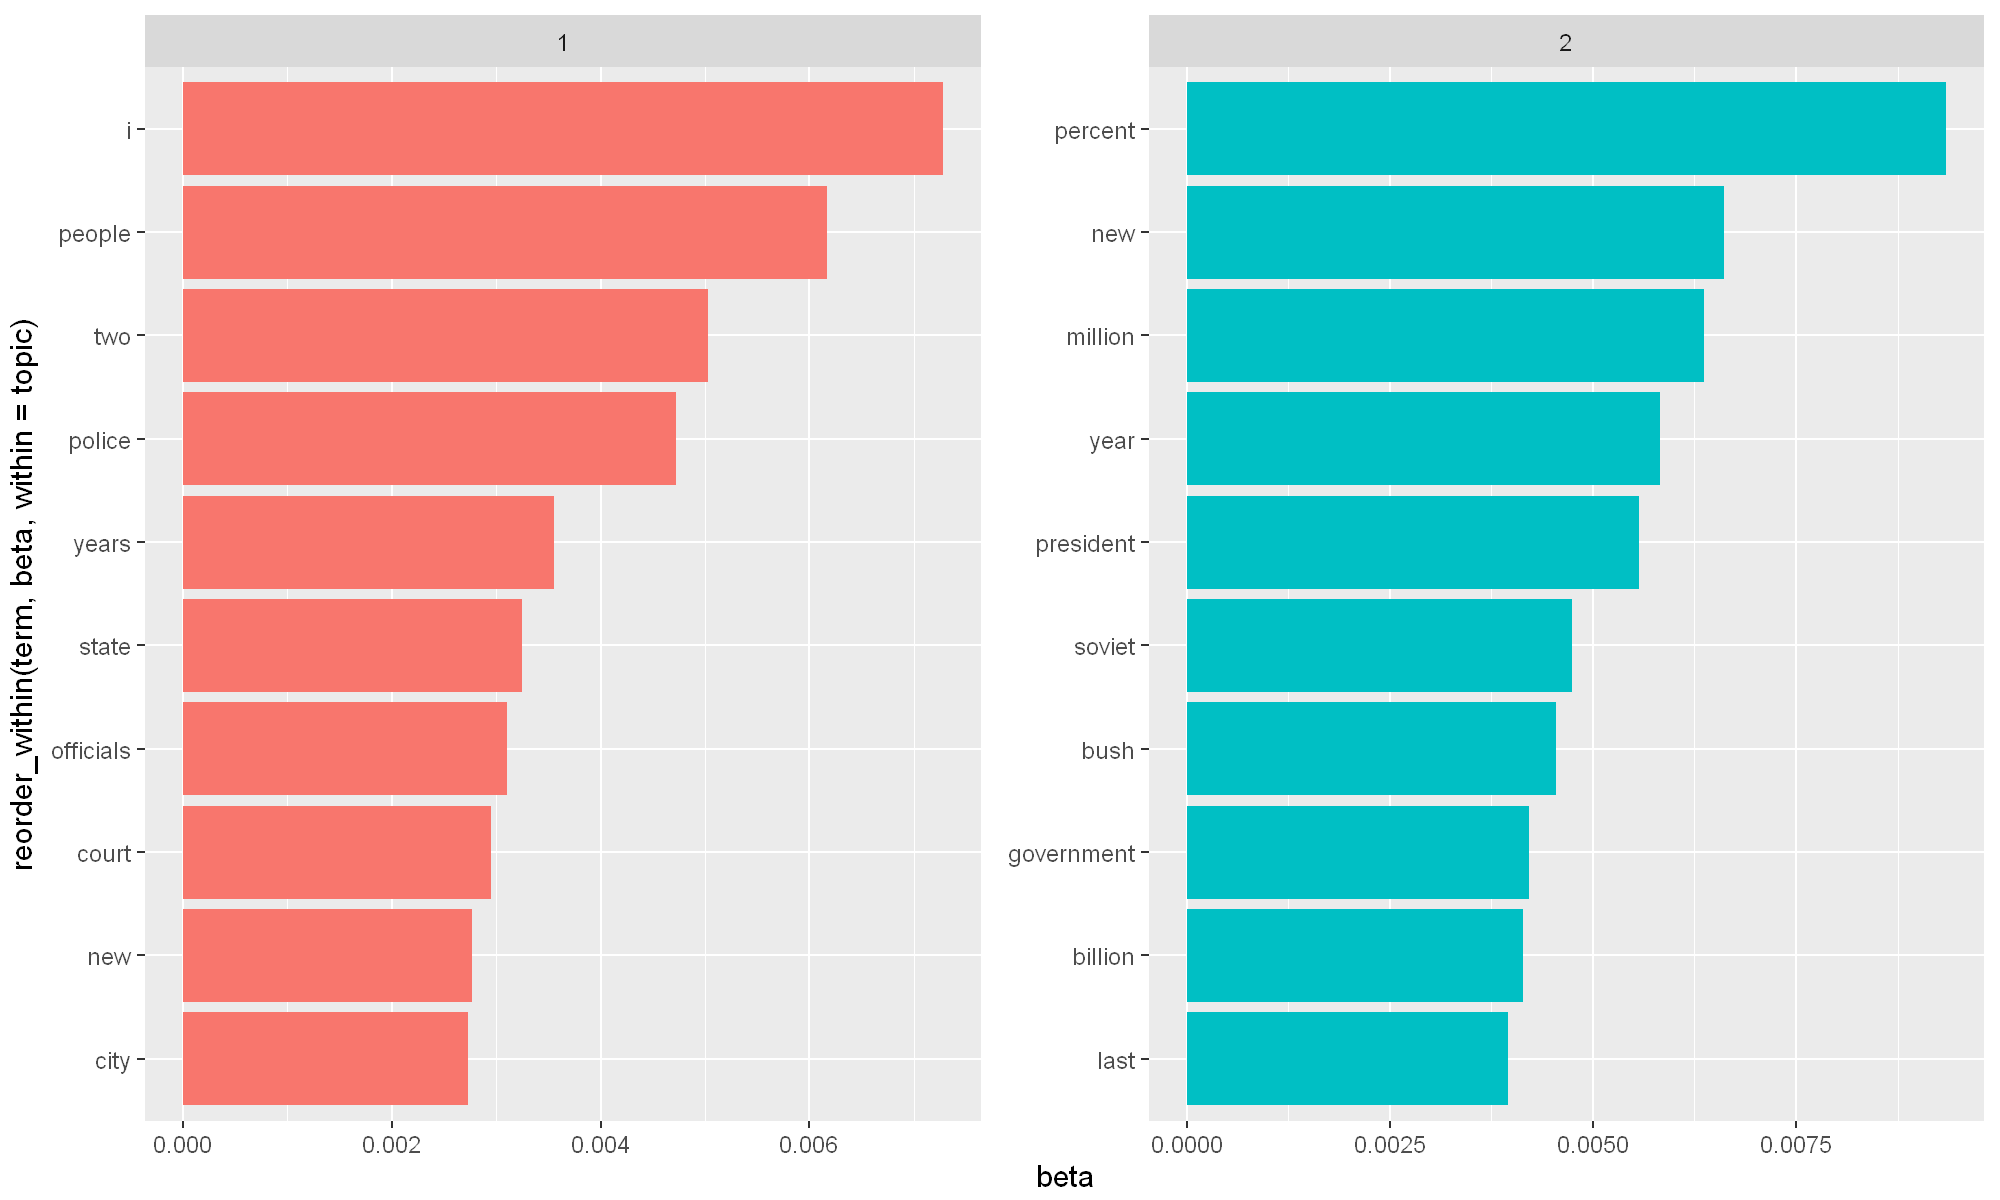

In [35]:
ap_top10_terms %>% 
  ggplot(aes(x = reorder_within(term, beta, within = topic), y = beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() +
  scale_x_reordered()

* 위 결과를 통해 두 가지 주제에 대해서 대략적인 감을 찾아볼 수 있다
* 토픽1은 “people”, “president”, “police”, “government” 등 정치와 관련된 뉴스 기사임을 대략적으로 알 수 있으며
* 토픽2는 “percent”, “million”, “company”등 경제 관련 뉴스 기사임을 확인할 수 있다.
* 또한 공통적으로 “years”와 같이 하나의 단어가 두 개의 토픽(클러스터)에서 높은 확률 값을 나타내고 있다.

In [49]:
ap_documents <- lda_mod %>% 
  tidy(matrix = "gamma")

ap_documents  %>% filter(document==1)

document,topic,gamma
<int>,<int>,<dbl>
1,1,0.994318182
1,2,0.005681818


In [51]:
AssociatedPress %>% 
  tidy() %>% 
  filter(document == 1) %>% 
  arrange(desc(count)) %>% filter(count>4)

document,term,count
<int>,<chr>,<dbl>
1,police,7
1,school,7
1,teacher,7
1,shot,5
1,students,5


# 참고문헌

[1] : [Text Mining with R](https://www.tidytextmining.com/)

[2] : [Blei, D., Carin, L., & Dunson, D. (2010). Probabilistic topic models. IEEE signal processing magazine, 27(6), 55-65.](https://ieeexplore.ieee.org/abstract/document/5563111)

[3] : [Darling, William M. "A theoretical and practical implementation tutorial on topic modeling and gibbs sampling." Proceedings of the 49th annual meeting of the association for computational linguistics: Human language technologies. 2011.](https://scholar.google.com/scholar?hl=ko&as_sdt=0%2C5&q=A+Theoretical+and+Practical+Implementation+Tutorial+on+Topic+Modeling+and+Gibbs+Sampling&btnG=)

[4] :  [Blei, David M., Andrew Y. Ng, and Michael I. Jordan. "Latent dirichlet allocation." the Journal of machine Learning research 3 (2003): 993-1022.](https://scholar.google.com/scholar?hl=ko&as_sdt=0%2C5&q=Latent+Dirichlet+Allocation&btnG=)

[5] : [백시온. "한국어 토픽모델링을 위한 단어 임베딩 활용 가능성 탐색." 국내석사학위논문 서울대학교 대학원, 2019. 서울](http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=bee51790c400f190ffe0bdc3ef48d419&outLink=K)

[6] : [Hankin, Robin KS. "A generalization of the Dirichlet distribution." Journal of Statistical Software 33.11 (2010): 1-18.](https://scholar.google.com/scholar?hl=ko&as_sdt=0%2C5&q=A+Generalization+of+the+Dirichlet+Distribution&btnG=)

[7] : [Griffiths, Thomas L., and Mark Steyvers. "Finding scientific topics." Proceedings of the National academy of Sciences 101.suppl 1 (2004): 5228-5235.](https://scholar.google.com/scholar?hl=ko&as_sdt=0%2C5&q=Finding+scientific+topics&btnG=#d=gs_cit&u=%2Fscholar%3Fq%3Dinfo%3AflVT7Jb-O_EJ%3Ascholar.google.com%2F%26output%3Dcite%26scirp%3D0%26hl%3Dko)

[8] : [한지영 and 허고은. "토픽 모델링 기반 비대면 강의평 분석 및 딥러닝 분류 모델 개발" 한국문헌정보학회지 55, no.4 (2021) : 267-291.](https://www.kci.go.kr/kciportal/ci/sereArticleSearch/ciSereArtiView.kci?sereArticleSearchBean.artiId=ART002778050)

[9] [Hornik, Kurt, and Bettina Grün. "topicmodels: An R package for fitting topic models." Journal of statistical software 40.13 (2011): 1-30.](https://epub.wu.ac.at/3987/)